# Learning Best Practice for Model Evaluation and Hyperparameter Tuning

In this chapter we will learn about followings:-

- Obtain unbiased estimates of a model's performance
- Diagnose the common problems of machine learning algorithms
- Fine-tuning machine learning models
- Evaluate predictive models using different performance metrics

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Streamlining workflows with pipeline

In [3]:
df = pd.read_csv('wdbc.data', header = None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

In [5]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [6]:
np.unique(y)

array(['B', 'M'], dtype=object)

In [7]:
#let's do label encoding of our classes
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

y = le.fit_transform(y)

In [9]:
np.bincount(y) #classes ratio B and M

array([357, 212], dtype=int64)

In [10]:
#let's split our dataset
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

## Combining transformers and estimators in a pipeline

Remember that we have to standarize our data for logistic regression model since it uses gradient descent optimization, standarized of data helps in reaching minimum cost function early.

Here we will going to use pipeline in sklearn library it helps to chain a lot of process of machine learning on both our training set and test set.

The make_pipeline function takes an arbitrary number of scikit-learn transformers(objects that support fit and transform method as inputs). Also make_pipeline function constructs a scikit-learn Pipeline object.<br>
There is no limit to the number of intermediate steps in a pipeline; however the last pipeline element has to be an estimator(model).

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [13]:
pipe_lr = make_pipeline(
    StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1)
)

In [14]:
pipe_lr.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=1, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [15]:
y_pred = pipe_lr.predict(X_test)

In [16]:
print('Test Accuracy: {:.3}'.format(pipe_lr.score(X_test,y_test)))

Test Accuracy: 0.956


## Using k-fold cross validation to assess model performance

To find an acceptable bias-variance trade-off, we need to evaluate our model carefully. **Cross-validation** help us obtain reliable estimates of the model's generalization performance i.e how well the model perform on unseen data.

We are going to discuss two cross validation technique here:-

- Holdout cross validation
- K-fold cross validation

Using the holdout method, we split out initial dataset into training dataset and test dataset - the training dataset is used for training our model, and the test dataset is used to estimate model generalization performance.

But we also have to do *model selection*, which refers to a given classification problem for which we want to select the optimal values of tuning parameters (also called hyperparameters).

The problem is if we reuse the same test dataset over and over again during **model selection**, it will become part of our training data and thus the model will be more likely to overfit. Thus it is not fare to use test dataset for model selection and testing the model.

A better way of using the holdout method for model selection is to separate the data into three parts:

- A training set
- A validation set
- A test set

The training set is use to fit the the different models.<br>
The performance on the validation set is then used for the model selection<br>
Now our test data is not yet exposed to our model, thus it is completely unseen by our model, hence it will be provide less biased estimate of model ability to generalize to a new data.

A *Disadvantage* of the holdout method is that the performance estimate may be very sensitive to how we partition the training set and validation sets

## K-Fold Cross validation

In K-Fold cross-validation we randomly split the training dataset into k folds without replacement, where k-1 folds are used for the model training, and one fold is used for performance evaluation. This procedure is repeated k times so that we obtain k models and performance estimates.

We then calculate the average performance of the models based on the different, independent folds to obtain a performance estimates that is less sensitive to the sub-partitioning of the training data compared to the holdout method.

Typically we use k-fold cross validation for **model tuning**, i.e finding the optimal hyperparameter values that yields a satisfying generalization performance.

Once we have found satisfactory hyperparmeter values, we can retrain the model on the complete training set and obtain a final performance estimate using the independent test set. We are doing training again after learning hyperparameter because it results in a more accurate and robust model.

**Note:- A good standard value for *k* in K-fold cross validation is 10, as it has been suggested that it offers the best tradeoff between the bias and variance**

A special case of k-fold cross validation is the **Leave-one-out cross validation (LOOCV)** method. In LOOCV, we set the number of folds equal to training samples (k=n) so that only one training sample is used for testing during each iteration, which is a recommended approach for working with very small datasets.

An improvement upon a K-fold cross validation is **Stratified K-fold cross validation**, which can yield better bias and variance estimates, especially in case of unequal class proportions. 

In stratified k-fold cross validation, <u>the class proportions are preserved in each fold</u> to ensure that each fold is representative of the class proportions in the training dataset.

In [17]:
from sklearn.model_selection import StratifiedKFold

In [18]:
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)

In [19]:
scores = []

for k, (train, test) in enumerate(kfold): #spl
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    
    print('Fold: {}, Class dist:. {}, Acc: {:.3}'.format(k+1, np.bincount(y_train[train]), score))

Fold: 1, Class dist:. [256 153], Acc: 0.935
Fold: 2, Class dist:. [256 153], Acc: 0.935
Fold: 3, Class dist:. [256 153], Acc: 0.957
Fold: 4, Class dist:. [256 153], Acc: 0.957
Fold: 5, Class dist:. [256 153], Acc: 0.935
Fold: 6, Class dist:. [257 153], Acc: 0.956
Fold: 7, Class dist:. [257 153], Acc: 0.978
Fold: 8, Class dist:. [257 153], Acc: 0.933
Fold: 9, Class dist:. [257 153], Acc: 0.956
Fold: 10, Class dist:. [257 153], Acc: 0.956


In [20]:
print('CV accuracy {:.3} +/- {:.3}'.format(np.mean(scores), np.std(scores)))

CV accuracy 0.95 +/- 0.0139


we can also we use cross_val_score provided by scikit-learn to do above process, one benefit of using cross_val_score is the parameter n_jobs that helps us distributing works among processor, which do works parallely and thus execution time is less.

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv = 10, n_jobs=-1)

In [23]:
print('CV accuracy score', scores)

CV accuracy score [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [24]:
print('CV average accuracy: {:.3} +/- {:.3}'.format(np.mean(scores), np.std(scores)))

CV average accuracy: 0.95 +/- 0.0139


## Debugging algorithms with learning and validation curve

Learning curves and validation curves help us improve the performance of a learning algorithm.

Learning curves help us to diagnose whether a learning algorithm has a problem with overfitting(high variance) or underfitting (high bias).

Validation curves help us to address the common issues of a learning algorithm.

## Diagnosing bias and variance problems with learning curves

By plotting <u>the model training and validation accuracies</u> as functions of the training set size, we can easily detect whether the model suffers from high variance or high bias, and <u>whether the collection of more data could help address the problem</u>. (Remember adding more data samples is a great way to solve overfitting, but sometime it is not feasible to do that).

Also note that while collecting more tranining data usually tends to decrease the chance of overfitting, it may not always help, for example, if the training data is extremely noisy or the model is already very close to optimal.

In [25]:
from sklearn.model_selection import learning_curve

In [26]:
pipe_lr = make_pipeline(
            StandardScaler(),
            LogisticRegression(penalty='l2', random_state = 1)
)

In [27]:
train_size, train_scores, test_scores = learning_curve(estimator=pipe_lr, X= X_train, y= y_train, train_sizes = np.linspace(0.1,1.0,10), cv = 10, n_jobs = -1)

In [28]:
#here train_size will be same as linspace we divided it into 10 equal parts thus it will be 10
#for each training set we will be doing stratified 10 fold cross validation
#each row contain accuracy score of training and test set for train_scores, test_scores
print('Train size',train_size.shape)
print('Train scores shape', train_scores.shape)
print('Test scores shape',test_scores.shape)

Train size (10,)
Train scores shape (10, 10)
Test scores shape (10, 10)


In [29]:
#for each training set we will be finding the average training accuracy as well as average test accuracy
train_mean = np.mean(train_scores, axis =  1) #average accuracy for training
train_std  =  np.std(train_scores, axis = 1)  #deviation 

test_mean = np.mean(test_scores, axis = 1)    #average accuracy for test set
test_std =  np.std(test_scores, axis = 1)     #deviation

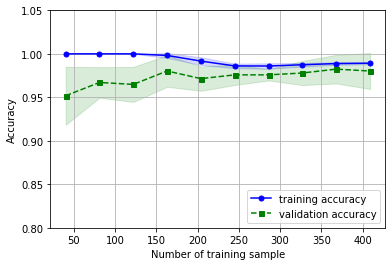

In [30]:
plt.plot(train_size, train_mean, color = 'blue', marker = 'o', linestyle = '-', markersize = 5, label = 'training accuracy')
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_size, test_mean, color = 'green', marker = 's', linestyle = '--', markersize = 5, label = 'validation accuracy')
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training sample')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.05])
plt.legend(loc = 'lower right')
plt.show()

As we can see in the diagram our model performs quite well on both the training and validation dataset if it had seen more than 250 samples during training. We can also see that the training accuracy increases for the training set with fewer than 250 samples, and the gap between validation and training accuracy widens - an indicator of an increasing degree of overfitting.

*Note:- we can observe that learning curve helps us in answering the question whether we need more samples or not*

## Addressing over - and underfitting with validation curves

Validation curve are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters e.g:- C for logisticRegression.

So we can learn various optimal value for model parameters using validation curves

In [31]:
from sklearn.model_selection import validation_curve

In [32]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
                estimator= pipe_lr,
                X = X_train,
                y = y_train,
                cv = 10,
                param_name = 'logisticregression__C',
                param_range = param_range
    
)

In [33]:
print('Train scores shape', train_scores.shape)
print('Test scores shape', test_scores.shape)

Train scores shape (6, 10)
Test scores shape (6, 10)


In [34]:
train_mean = np.mean(train_scores, axis = 1) #average accuracy score for training sample
train_std = np.std(train_scores, axis = 1)   #deviation from mean for training sample

test_mean = np.mean(test_scores, axis = 1)  #average accuracy score for test sample
test_std = np.std(test_scores, axis = 1)    #deviation from mean for test sample

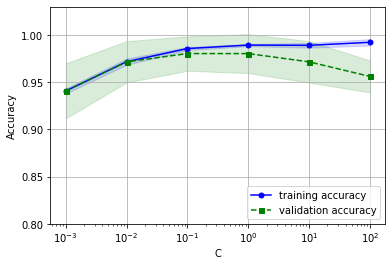

In [35]:
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(param_range, test_mean, color = 'green', marker = 's', markersize = 5, linestyle = '--', label = 'validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8,1.03])
plt.show()

As we can see from the above graph our model perform well for the C parameter in between [0.01, 0.1], after that there is a gap between training and validation accuracy suggesting our model start to become overfit.

param name is written like objectname__parmetername, for pipelining objectname should be name created by pipleline object.

By default for classification validation cuve used Stratified K Fold otherwise it used K Fold.

*we can say that validation curve is use to tune the hyperparmeter of model*

# Fine-tuning machine learning models via grid search

In machine learning we have two types of parameters:

1. Those that are learned from the training data.
2. Tuning parameters also called as Hyper parmeters.

**Grid Search** is a hyper parmeter optimization technique that help us improve the performance of a model by finding the optimal combination of hyperparmeter values.

## Tuning hyperparameters via grid search

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [37]:
pipe_svc = make_pipeline(
        
            StandardScaler(),
            SVC(random_state = 1)
    
)

In [38]:
pipe_svc

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [39]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


In [40]:
#for grid search param_grid should be dic or list of dic
param_grid = [
    
    {'svc__C':param_range, 'svc__kernel':['linear']},
    {'svc__C':param_range, 'svc__kernel':['rbf'], 'svc__gamma':param_range}
]

In [41]:
gs = GridSearchCV(
        estimator=pipe_svc,
        param_grid=param_grid,
        cv = 10,
        scoring = 'accuracy',
        n_jobs=-1
)

In [42]:
gs

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=1,
                                            shrink...
                                verbose=False),
             iid='warn', n_jobs=-1,
     

In [43]:
gs = gs.fit(X_train, y_train)

In [44]:
print(gs.best_score_)   #score of best performing models

0.9846153846153847


In [45]:
print(gs.best_params_) #parameter for best performing models

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


As you can observe that grid search helps us in finding optimal hyperparmeter for our models

In [46]:
model = gs.best_estimator_ #it return models with best hyperparameter and we can retrain our models.

In [47]:
model #it will preserve our pipeline and model, but the catch is model hyperparmeter will be optimal for our performance

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [48]:
model.fit(X_train, y_train) #training again, remember it will improve the model accuracy and its robustness

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [49]:
print('Test accuracy: {:.3}'.format(model.score(X_test,y_test)))

Test accuracy: 0.974


## Tuning Hyperparmeter via Random Search

GridSearchCV can be computationally expensive, especially if we are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is **RandomSearchCV**, in which not all hyperparameter values are tried out. Instead a fixed number of hyperparameters settings is sampled from specified probability distributions. 

It is possible that RandomSearchCV don't find as accurate of result as GridSearchCV, it surprisingly picks the best result more often than not and in a *fraction* of the time it takes GridSearchCV would have taken.

If our dataset is too large it is advisable to instead perform a Randomized search. With lower dataset GridSearchCV will usually outperform RandomSearchCV.

we controlled iteration in random search by n_iter by default it is 10

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
#for random search param_dis should be dis

param_dist = {
    
    'svc__kernel':['linear','rbf'],
    'svc__C':param_range,
    'svc__gamma':param_range
}

In [52]:
rs = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_dist, random_state=1, n_jobs=-1, scoring='accuracy', cv=10)

In [53]:
rs = rs.fit(X_train, y_train)

In [54]:
print('Best socre', rs.best_score_)

Best socre 0.9802197802197802


In [55]:
print('Best params',rs.best_params_)

Best params {'svc__kernel': 'linear', 'svc__gamma': 1.0, 'svc__C': 0.1}


In [56]:
model = rs.best_estimator_

In [57]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1.0,
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [58]:
print('Test accuracy', model.score(X_test, y_test))

Test accuracy 0.9736842105263158


# Algorithm Selection with nested cross-validation

If we want to select among different machine learning algorithms we can use nested cross-validation.



In [59]:
gs = GridSearchCV(
        estimator=pipe_svc,
        param_grid= param_grid,
        scoring = 'accuracy',
        cv = 2
)

In [60]:
scores = cross_val_score(estimator=gs, X=X_train, y= y_train, scoring = 'accuracy', cv = 5)

In [61]:
print('CV accuracy: {:.3} +/- {:.3}'.format(np.mean(scores), np.std(scores)))

CV accuracy: 0.974 +/- 0.0149


# Looking at different performance evaluation metrics

we can observe that previously for our model evaluation we have use *accuracy* score. Here we will look at different evaluation metrics for our model performance measurement.



# confusion matrix

A confusion matrix is a matrix that lays out the performance of a learning algorithm. The confusion matrix is simply a **sqaure matrix** that reports the count of the **True positive (TP), True negative (TN), False positive (FP), False negative (FN)** <u>predictions of a classifier</u>.

           P          N    (Predicted) -->
      P    TP         FN
      
      N    FP         TN
      
   (Actual) 
   
       |
       |
       v

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [64]:
y_pred = pipe_svc.predict(X_test)

In [65]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [66]:
print(confmat)

[[71  1]
 [ 2 40]]


In [67]:
import seaborn as sns

Text(33.0, 0.5, 'true label')

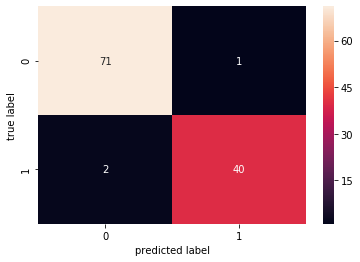

In [68]:
sns.heatmap(confmat, annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')

As we can observe in above diagram our model miscassified 0 as 1 one time, and 1 as 0 two times

## Optimizing the precision and recall of a classification method

Error(ERR) -> The error can be understand as the sum of all false classification divided by the number of total predictions.

Accuracy(ACC) -> The accuracy is calculated as the sum of correct prediction divided by the total number of predictions.

Both this prediction provide general information about how many samples are miss-classified.

$ ERR = \frac {FP + FN} {FP + FN + TP + TN} $

$ ACC = \frac {TP + TN} {TP + TN + FP + FN} = 1 - ERR $

The **True Positive Rate (TPR)** and **False Positive Rate (FPR)** are performance metrics that are especially useful for **imbalance class problem**

TPR is defined as from the given positive label how many samples are truly identified as positive.<br>
FPR is defined as from the given samples that are negative how many are incorrectly identified as positive.

$ TPR = \frac {TP} {TP + FN} $

$ FPR = \frac {FP} {TN + FP} $

Precision (PRE), can be though as the ratio of correctly identified positive sample with respect to total sample identified as positive.

$ PRE = \frac {TP} {TP + FP} $

recall (REC), is same as TPR.

$ REC = \frac {TP} {TP + FN} $, it is also called as sensitivity



F1 - score, is a combination of PRE and REC, basically a harmonic mean

$ F1 = 2 \frac {PRE  *  REC} {PRE + REC} $

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [70]:
print('Precision: {:.3f}'.format(precision_score(y_pred = y_pred, y_true = y_test)))
print('Recall: {:.3f}'.format(recall_score(y_true = y_test,y_pred = y_pred)))
print('F1 Score: {:.3f}'.format(f1_score(y_test,y_pred)))

Precision: 0.976
Recall: 0.952
F1 Score: 0.964


**Note: In scikit learn positive class is the class that is labelled as 1**

If we want to specify a different positive label, we can construct our own scorer via *make_scorer* function

In [71]:
from sklearn.metrics import make_scorer

In [72]:
scorer = make_scorer(f1_score, pos_label = 0) #supplying f1_score 0 as positive, by default it will be 1

In [73]:
gs = GridSearchCV(
        estimator=pipe_svc,
        param_grid=param_grid,
        scoring=scorer,
        cv = 10
)

In [74]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=1,
                                            shrink...
             iid='warn', n_jobs=None,
             param_grid=[{'svc__C': [0.0001, 0.001,

In [75]:
print('Best score:',gs.best_score_)
print('Best params:',gs.best_params_)

Best score: 0.9880219137963148
Best params: {'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


## Plotting a Receiver operating characterstics (sensitivity vs 1- specificity i.e FPR)

Sensitivity also called as Recall is the model ability to predict true positive out of total actual positive sample

$ Sensitivity = Recall = TPR = \frac {TP} {TP + FN} $

Specificity is the model ability to predict true negative out of total actual negative sample. (Consider it as True Negative Rate)

$ Specificity = TNR = \frac {TN} {TN + FP} = 1 - FPR $

**ROC** graphs are useful tools to select models for classification based on their performance with respect to **TPR (Sensitivity)** and **FPR (1 - specificity)**, which are computed by shifting the <u>decision threshold of classifier</u>.

The diagonal of an ROC graph can be interpreted as *random guessing*, and classification methods that fall below the diagonal are considered as worse than random guessing. diagonal is a line where TPR = FPR 

A perfect classifier would fall into the *top left* corner of the graph with a TRP of 1 and an FPR of 0.

In [76]:
from sklearn.metrics import roc_curve, auc

In [77]:
from scipy import interp

In [79]:
pipe_lr = make_pipeline(
            StandardScaler(),
            PCA(n_components=2),
            LogisticRegression(penalty='l2', random_state = 1, C = 100.0)
)

In [90]:
X_train2 = X_train[:,[4,14]]

In [101]:
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))

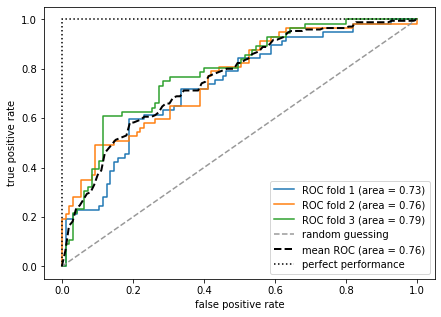

In [140]:
fig = plt.figure(figsize = (7,5))

mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100) #dividing probability in 0 to 1

all_tpr = []

for i , (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    
    fpr, tpr, thresholds = roc_curve(y_train[test], y_score=probas[:,1], pos_label=1)
    
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'ROC fold {} (area = {:.2f})'.format(i+1, roc_auc))

plt.plot([0,1],[0,1],linestyle = '--', color = (0.6,0.6,0.6), label = 'random guessing')
mean_tpr /= len(cv) #averaging means
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label = 'mean ROC (area = {:.2f})'.format(mean_auc), lw = 2)

    
plt.plot([0,0,1],[0,1,1], linestyle=':', color = 'k', label = 'perfect performance')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc = 'lower right')
plt.show()

## Dealing with class imbalance